In [ ]:
!pip install matplotlib
!pip install pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D #Used to plot in a 3D place
%matplotlib notebook

In [2]:
X = np.?([[1,6,2], #x0, study time, play time
               [1,7,4],
               [1,3,2],
               [1,1,2],
               [1,6,3]]) #multilinear data

Y = np.?([[70],
               [72],
               [50],
               [45],
               [73]]) #multilinear labels
X
#What np.matrix does is that when you define a list as np.matrix, it pre-calculates the inverse and transpose of that matrix
#and stores the values which can be called as X.I for inverse and X.T for transpose

matrix([[1, 6, 2],
        [1, 7, 4],
        [1, 3, 2],
        [1, 1, 2],
        [1, 6, 3]])

In [4]:
X.T

matrix([[1, 1, 1, 1, 1],
        [6, 7, 3, 1, 6],
        [2, 4, 2, 2, 3]])

In [5]:
XT = X.T #X Transpose

In [6]:
XT

matrix([[1, 1, 1, 1, 1],
        [6, 7, 3, 1, 6],
        [2, 4, 2, 2, 3]])

In [8]:
np.dot(XT,X).I

matrix([[ 2.32701422,  0.03317536, -0.87677725],
        [ 0.03317536,  0.07582938, -0.14691943],
        [-0.87677725, -0.14691943,  0.5971564 ]])

In [9]:
XTX_inv = np.?(XT,X).I #inverse of XTranspose.X

In [10]:
theta = np.?(XTX_inv , np.dot(XT,Y))#Inverse(XTX).XT.Y, we did this formula with derivation in class
#It is the formula to determine the bias and weights, here stored in matrix B (Theta) (Theta0,Theta1,...)

In [11]:
theta #First value is bias rest all are weights

matrix([[39.16587678],
        [ 5.37914692],
        [-0.73459716]])

In [17]:
y_hat = ? #Yhat = X.theta was the formula for predicted Y, we started off our derivation with this formula
#Since we wanted error to be 0, we equated Y = Yhat

In [18]:
y_hat

matrix([[69.97156398],
        [73.88151659],
        [53.83412322],
        [43.07582938],
        [69.23696682]])

In [22]:
epsilon = np.array((Y-y_hat))**2 #Epsilon is used to denote error
np.mean(epsilon)

7.2208530805687206

In [51]:
epsilon_T = epsilon.T

In [52]:
SSR = np.?(epsilon_T,epsilon) #if you want sum of squared error use this formula

In [53]:
SSR #Aum of Squared Errors

matrix([[3324.98591676]])

In [54]:
eps = np.sqrt(SSR) #This gives underroot(SSR)

In [55]:
eps

matrix([[57.66269086]])

In [56]:
yhat = np.dot([[1,10000,160]],theta) #Prediction for single point
yhat

matrix([[53713.09952607]])

In [57]:
min(X1)

array([1])

<IPython.core.display.Javascript object>


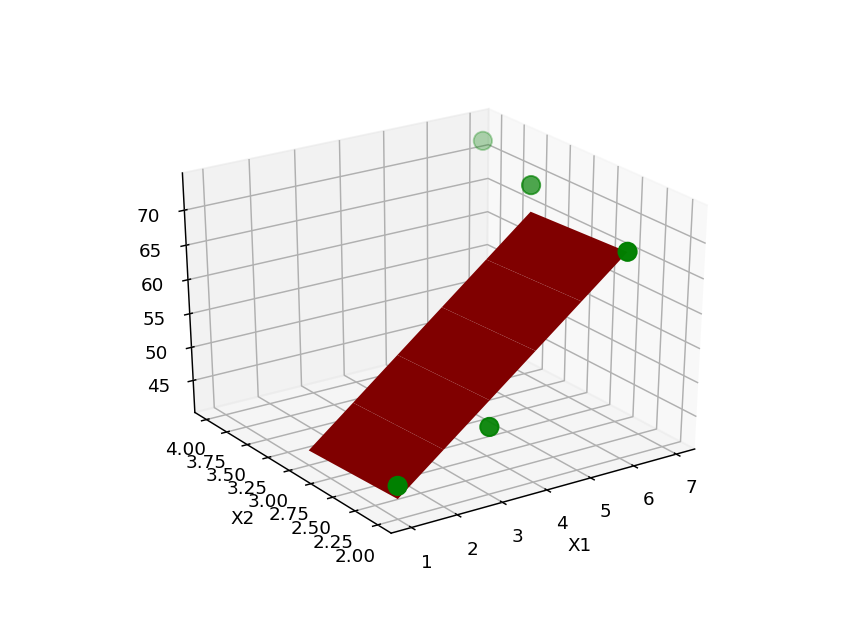

In [59]:
#Taken from mpl_toolkit documentation 
plt3d = plt.figure().?(projection = '3d')
X1 = np.?(X[:,1]) #Array of X1 features
X2 = np.?(X[:,2]) #Array of X2 features
xx , yy = np.meshgrid(range(min(X1)[0],max(X1)[0]),range(min(X2)[0],max(X2)[0])) #Creates a meshgrid in 3D
plt3d.?(np.array(X[:,1]),np.array(X[:,2]),
              np.array(Y[:,0]),color = 'g',s=100) #Scattering of points (X1,X2,Y)
plt3d.?(xx,yy,
                   np.array(theta[0,0]+theta[1,0]*xx
                            +theta[2,0]*yy),color = 'r') #Plots the plane formed in 3D space 
#Plane is formed due to performing multilinear regression on 2 features, performing on 3 or more features 
#results in hyperplane, 1 feature results in line (This was discussed briefly in class)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [39]:
#We have now created functions to turn any dataset into aur matrix format so that we can apply our equations on it
def make_X_mat(dataset):
    return np.append(
        np.ones((dataset.shape[0],1)),
        dataset,
        axis=1)

In [95]:
#Calculates weights and bias matrix for given input
def get_theta(X,Y):
    XT = X.T
    XTX_inv = np.dot(XT,X).I
    return np.dot(XTX_inv , np.dot(XT,Y))

In [96]:
#Gives prediction for given feature matrix
def predict(X,theta):
    return(np.dot(X,theta))

In [97]:
X = np.array([1,2,3])

In [98]:
#We performed all the operations defined above on our dataset and retrieved a weights and bias matrix theta for it
df = pd.read_csv('bike sharing hour.csv')
#list(df)
df.drop(['dteday'],1,inplace = True)
df.drop(['instant'],1,inplace = True)
full_data = df.astype(float).values.tolist()

In [99]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [100]:
Xdat = np.matrix(df.drop(['cnt'],1).astype(float).values.tolist())

In [101]:
Y = np.matrix(full_data)[:,-1]

In [102]:
X = make_X_mat(Xdat)

In [103]:
X

matrix([[ 1.    ,  1.    ,  0.    , ...,  0.    ,  3.    , 13.    ],
        [ 1.    ,  1.    ,  0.    , ...,  0.    ,  8.    , 32.    ],
        [ 1.    ,  1.    ,  0.    , ...,  0.    ,  5.    , 27.    ],
        ...,
        [ 1.    ,  1.    ,  1.    , ...,  0.1642,  7.    , 83.    ],
        [ 1.    ,  1.    ,  1.    , ...,  0.1343, 13.    , 48.    ],
        [ 1.    ,  1.    ,  1.    , ...,  0.1343, 12.    , 37.    ]])

In [104]:
X.shape

(17379, 15)

In [105]:
print(X)

[[ 1.      1.      0.     ...  0.      3.     13.    ]
 [ 1.      1.      0.     ...  0.      8.     32.    ]
 [ 1.      1.      0.     ...  0.      5.     27.    ]
 ...
 [ 1.      1.      1.     ...  0.1642  7.     83.    ]
 [ 1.      1.      1.     ...  0.1343 13.     48.    ]
 [ 1.      1.      1.     ...  0.1343 12.     37.    ]]


In [106]:
theta =get_theta(X,Y)

In [107]:
theta


matrix([[ 2.38742359e-11],
        [-1.56106239e-11],
        [ 1.00897068e-11],
        [ 3.34487993e-12],
        [-9.59232693e-14],
        [-9.03810360e-12],
        [-3.69482223e-13],
        [-2.89901436e-12],
        [ 4.26325641e-13],
        [ 3.36513040e-11],
        [-4.45652404e-11],
        [-6.59383659e-12],
        [-7.27595761e-12],
        [ 1.00000000e+00],
        [ 1.00000000e+00]])

In [108]:
## theta #theta
#as was discussed all weights and even the bias becomes negligible except the weight for the last 2 features
#This means that only the last 2 features are really required to calculate the predicted Y

In [23]:
yhat = predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,-300,120]],theta)

NameError: name 'predict' is not defined

In [ ]:
yhat

In [66]:
yhat = predict(X,theta)

In [67]:
Y-yhat

matrix([[ 2.70006240e-13],
        [ 2.91322522e-13],
        [ 3.83693077e-13],
        ...,
        [-4.58157956e-11],
        [-4.54818405e-11],
        [-4.47855086e-11]])

In [68]:
eps = Y-yhat

<IPython.core.display.Javascript object>


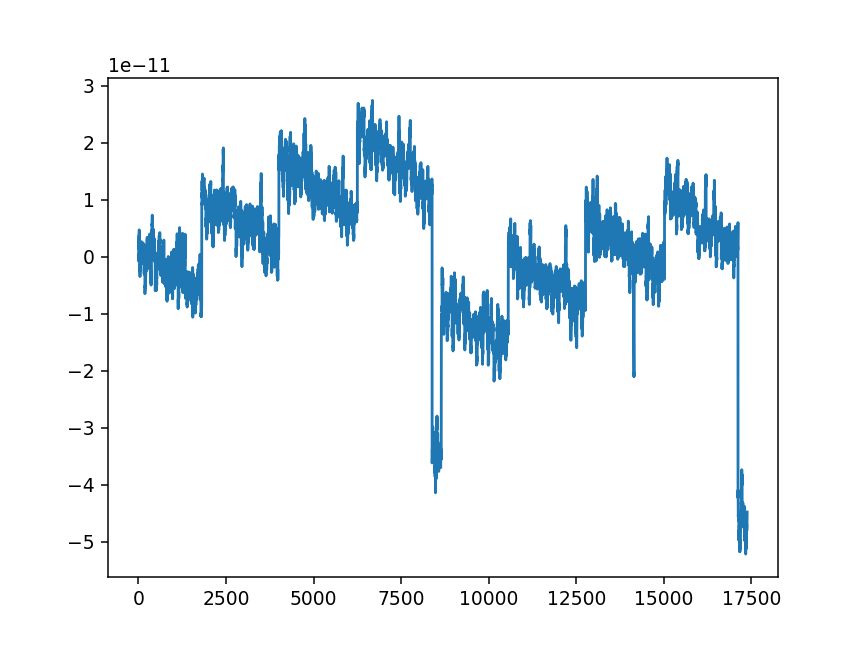

In [55]:
#Here we have plotted error on a number line for point 1 to the last point in the dataset
#You can also see that the error is in range of 1e-11 which is really really small
plt1 = plt.figure()
plt.plot(range(1,len(Xdat)+1),np.array(eps))
plt.show()